In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Dados disponíveis em: https://www.kaggle.com/datasets/srolka/ecommerce-customers

In [3]:
eCommerce = pd.read_csv('C:/Users/Samsung/Documents/GitHub-Datas/Machine_Learnin_Steps/Dataset eCommerce/Ecommerce Customers.csv', sep=',')
eCommerce.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


#### Análise inicial dos dados.

In [4]:
eCommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


#### Principais dados estatísticos.

In [6]:
eCommerce.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### Identificação de variáveis lineares com nossa variável de valor gasto 'Yearly Amount Spent'.

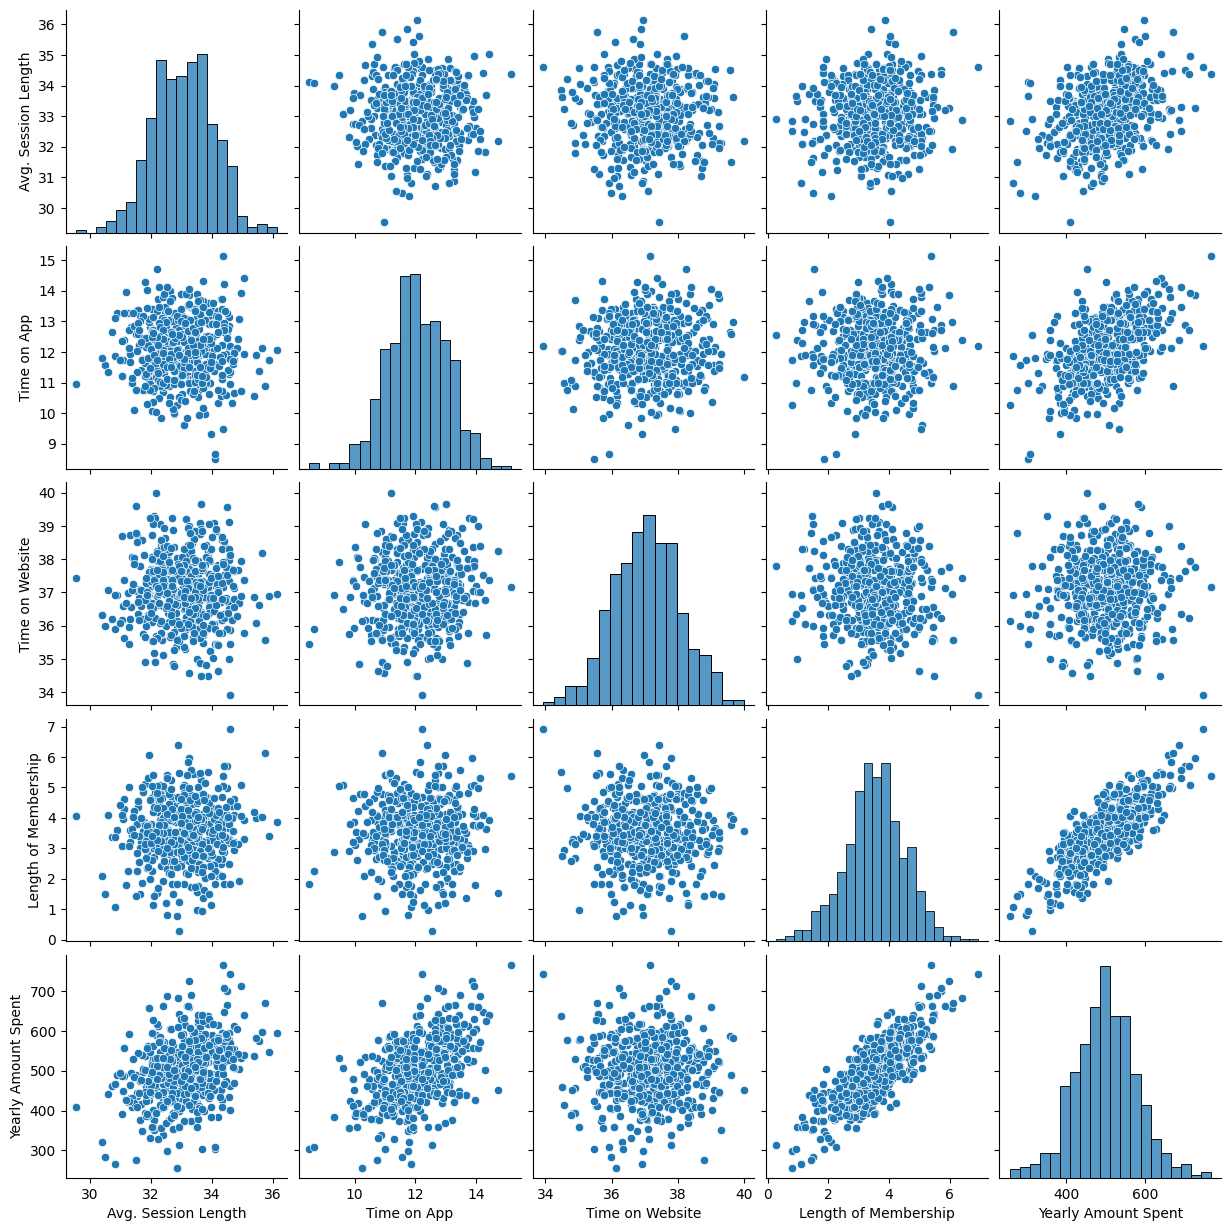

In [5]:
sns.pairplot(eCommerce)

#### Variável sem tanto correlação com a variável de desejo.

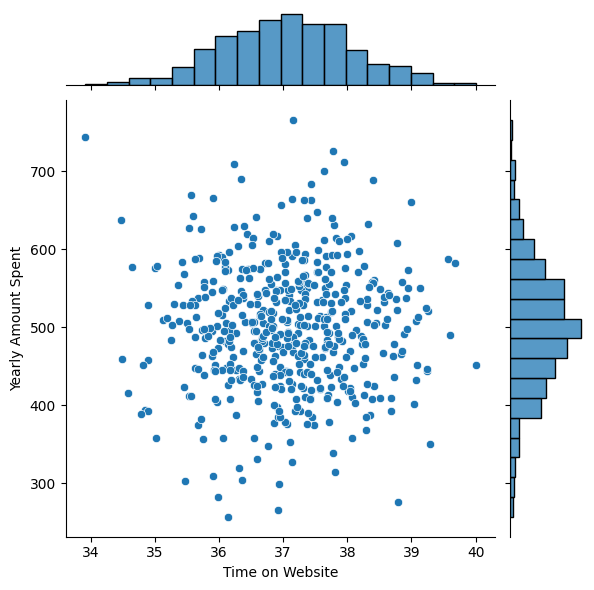

In [8]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=eCommerce)

In [10]:
correlacao = eCommerce['Time on Website'].corr(eCommerce['Yearly Amount Spent'])
correlacao

-0.0026408446721588943

#### Aqui identificamos as variáveis com maior correlação.

<Axes: >

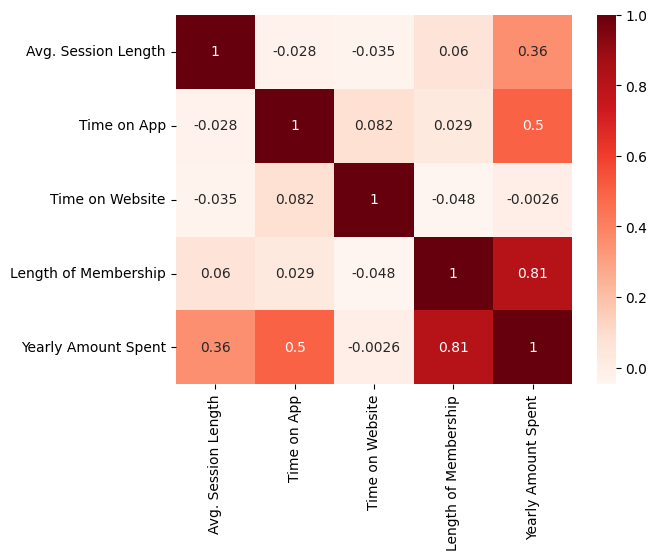

In [12]:
numeric_data = eCommerce.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(), annot=True, cmap='Reds')

#### Outras maneiras de identificar.

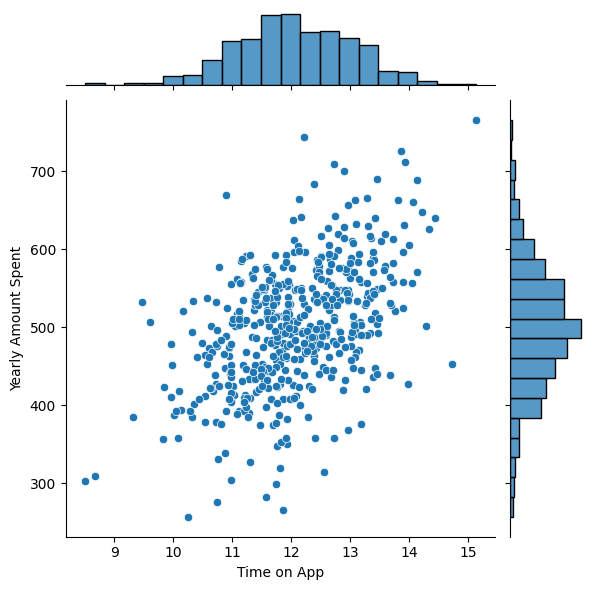

In [13]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=eCommerce)

#### Claramente a variável com maior correlação linear. O que faz sentido, quanto mais tempo a pessoa for membro do grupo, mais ela gaste.

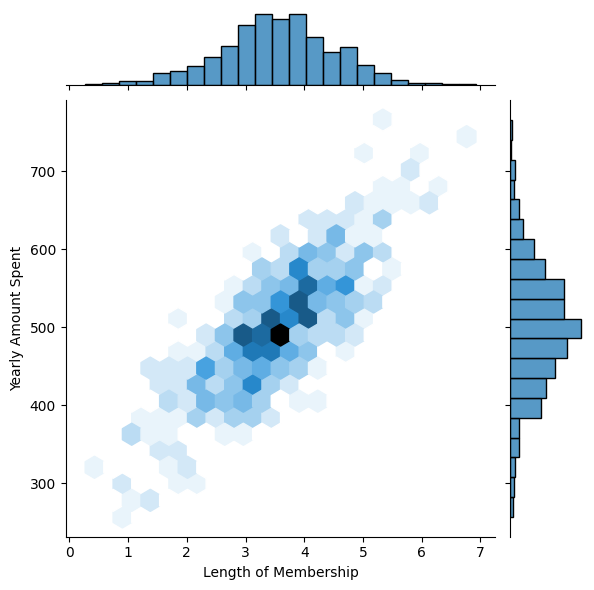

In [17]:
sns.jointplot(x='Length of Membership', y= 'Yearly Amount Spent', data=eCommerce, kind='hex')

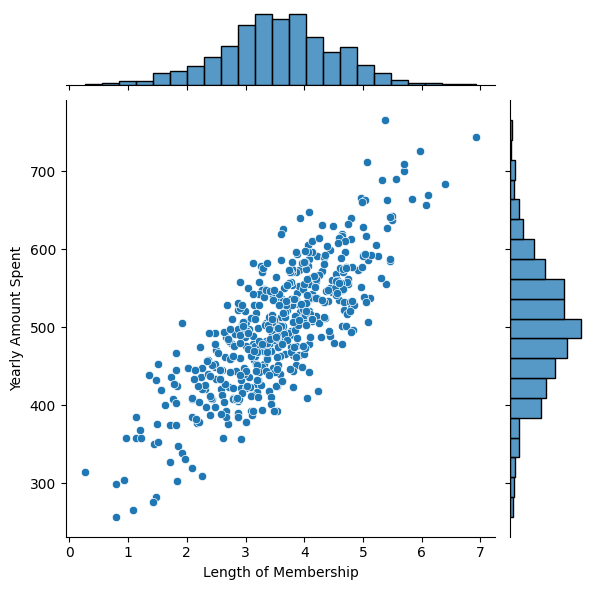

In [16]:
sns.jointplot(x='Length of Membership', y='Yearly Amount Spent', data=eCommerce)

#### Podemos inclusive colocar um modelo linear.

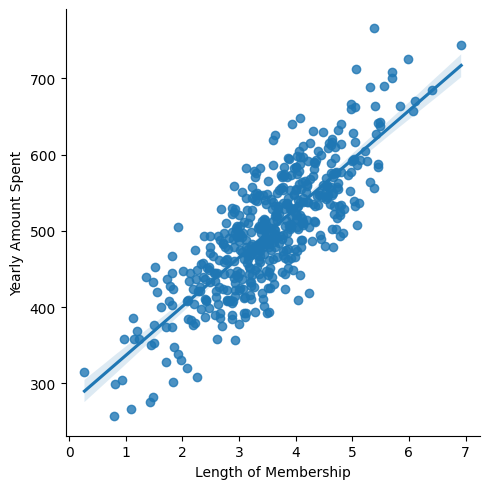

In [18]:
sns.lmplot(x ='Length of Membership', y= 'Yearly Amount Spent', data=eCommerce)

#### Vamos iniciar o treinamento e teste dos modelos. Sendo Y a variável que queremos prever.

In [20]:
Y = eCommerce['Yearly Amount Spent']
X = eCommerce[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

In [21]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test  = train_test_split(X ,Y , test_size=0.3, random_state = 101)

In [24]:
from sklearn.linear_model import LinearRegression 

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(x_train, y_train)

LinearRegression()

In [27]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

#### Modelo ajustado, vamos fazer previsões.

In [28]:
prediction = lm.predict(x_test)


Text(0, 0.5, 'Predicted Y')

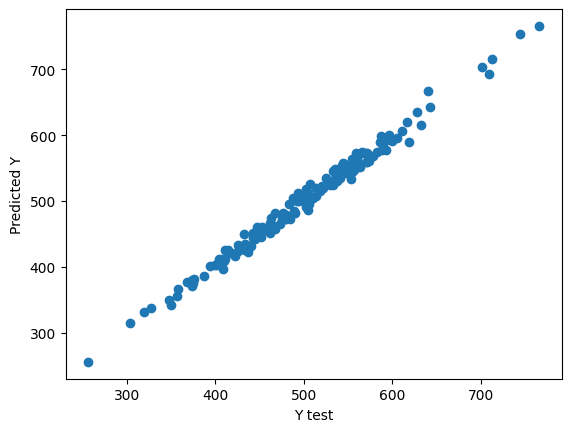

In [29]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

#### Vamos melhorar um pouco. Os dados previstos acompanham bem os dados reais, fizemos uma boa predição.

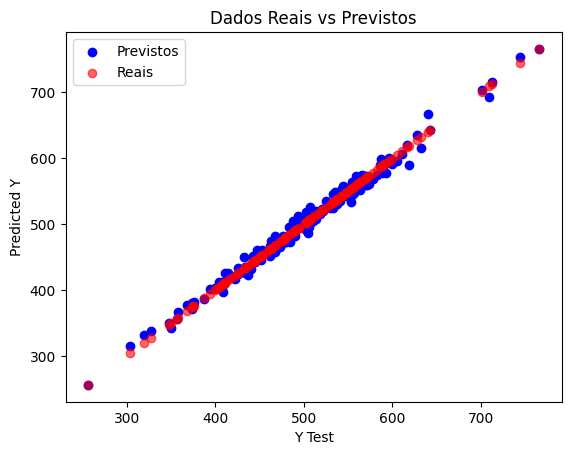

In [30]:

plt.scatter(y_test, prediction, color='blue', label='Previstos')  # Pontos previstos
plt.scatter(y_test, y_test, color='red', label='Reais', alpha=0.6)  # Pontos reais
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.legend()
plt.title('Dados Reais vs Previstos')
plt.show()


#### Principais métricas de acurácia.

In [31]:
from sklearn import metrics
print('MAE',  (metrics.mean_absolute_error(y_test , prediction)).round(2))
print('MSE',  (metrics.mean_squared_error(y_test , prediction)).round(2))
print('RMSE',  np.sqrt(metrics.mean_squared_error(y_test , prediction)).round(2))

MAE 7.23
MSE 79.81
RMSE 8.93


<ipython-input-32-45e8191cf51e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-prediction), bins=50)


<Axes: xlabel='Yearly Amount Spent', ylabel='Density'>

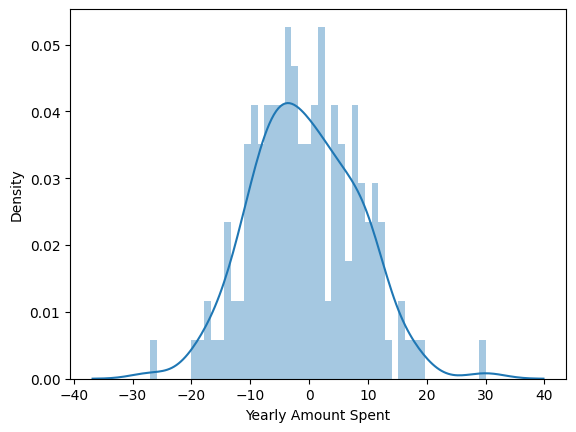

In [32]:
sns.distplot((y_test-prediction), bins=50)

In [34]:
coef= pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


#### E aqui podemos interpretar assim algumas variáveis, a cada 1 tempo gasto no App, temos um aumento de gasto médio anual do cliente em 38,59. O aumento de um ano que o cliente é membro da empresa ele gasta em média anualmente 61,28.  Lembrando que isso é um modelo ajustado aos dados, não estamos levando em conta inferência causal, pois para se fazer esse tipo de análise seria necessário utilizar métodos estatisticos mais avançados de tratamento e controle e os métodos para a literatura específica.